In [57]:
# import pandas as pd
# from scipy.interpolate import interp1d

# # Read the file into a DataFrame
# df_pre = pd.read_csv(
#     r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800.txt", 
#     sep='\s+',       # '\s+' means "split on any whitespace"
#     header=None,     # or specify a row number if there's a header
#     engine='python'
# )

# df_obl = pd.read_csv(
#     r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800.txt", 
#     sep='\s+',       # '\s+' means "split on any whitespace"
#     header=None,     # or specify a row number if there's a header
#     engine='python'
# )

# df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000
# df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# df_pre = df_pre.iloc[::-1]
# df_pre.columns = ['age', 'pre']

# df_pre = df_pre[(df_pre['age'] >= 0) & (df_pre['age'] <= 641200)]

# print(df_pre)

       age  d18O
0 -16.5010 -9.50
1   0.0000 -9.66
2  19.9980 -9.58
3  38.2475 -9.50
4  56.4970 -9.33
641264.4
-16.501
          age       pre
800       0.0  0.016280
799    1000.0  0.017116
798    2000.0  0.016308
797    3000.0  0.014018
796    4000.0  0.010453
..        ...       ...
4    796000.0  0.015048
3    797000.0  0.016748
2    798000.0  0.016591
1    799000.0  0.014713
0    800000.0  0.011391

[801 rows x 2 columns]


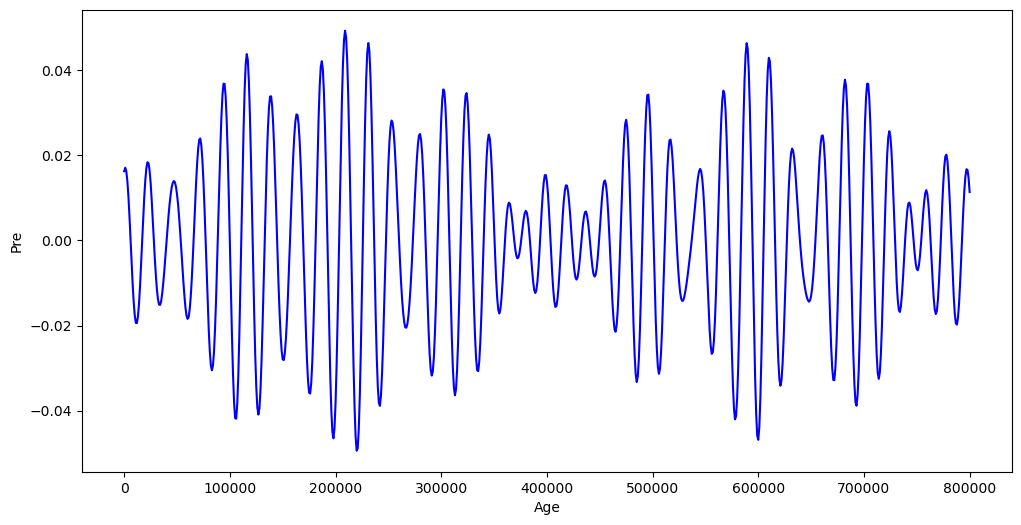

          age       obl
800       0.0  0.409093
799    1000.0  0.411353
798    2000.0  0.413555
797    3000.0  0.415639
796    4000.0  0.417555
..        ...       ...
4    796000.0  0.409597
3    797000.0  0.408234
2    798000.0  0.406853
1    799000.0  0.405493
0    800000.0  0.404191

[801 rows x 2 columns]


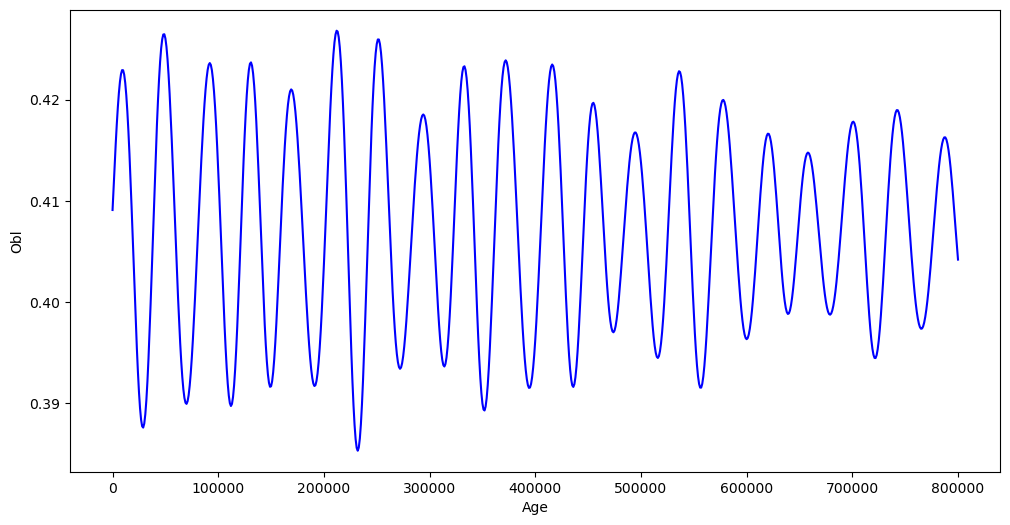

        age       pre
800     0.0  0.016280
799  1000.0  0.017116
798  2000.0  0.016308
797  3000.0  0.014018
796  4000.0  0.010453
        age       obl
800     0.0  0.409093
799  1000.0  0.411353
798  2000.0  0.413555
797  3000.0  0.415639
796  4000.0  0.417555


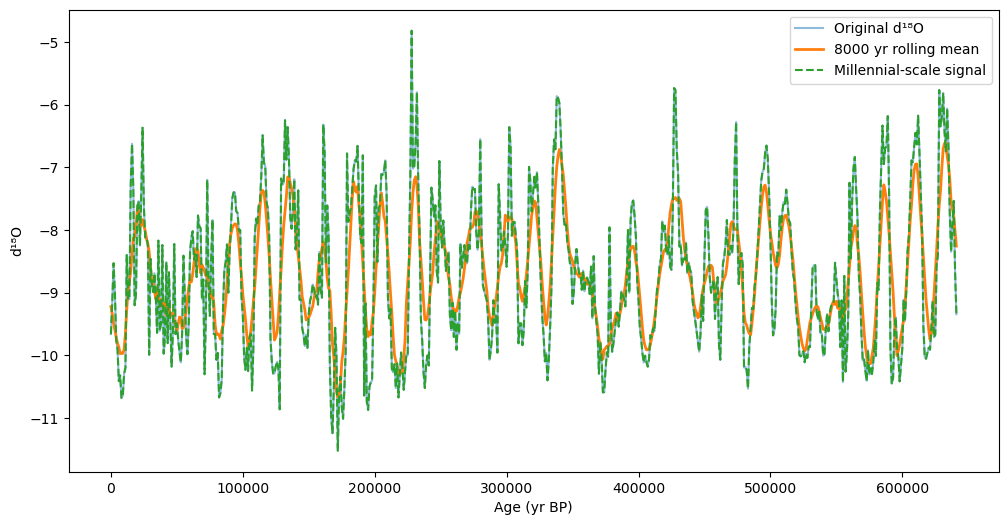

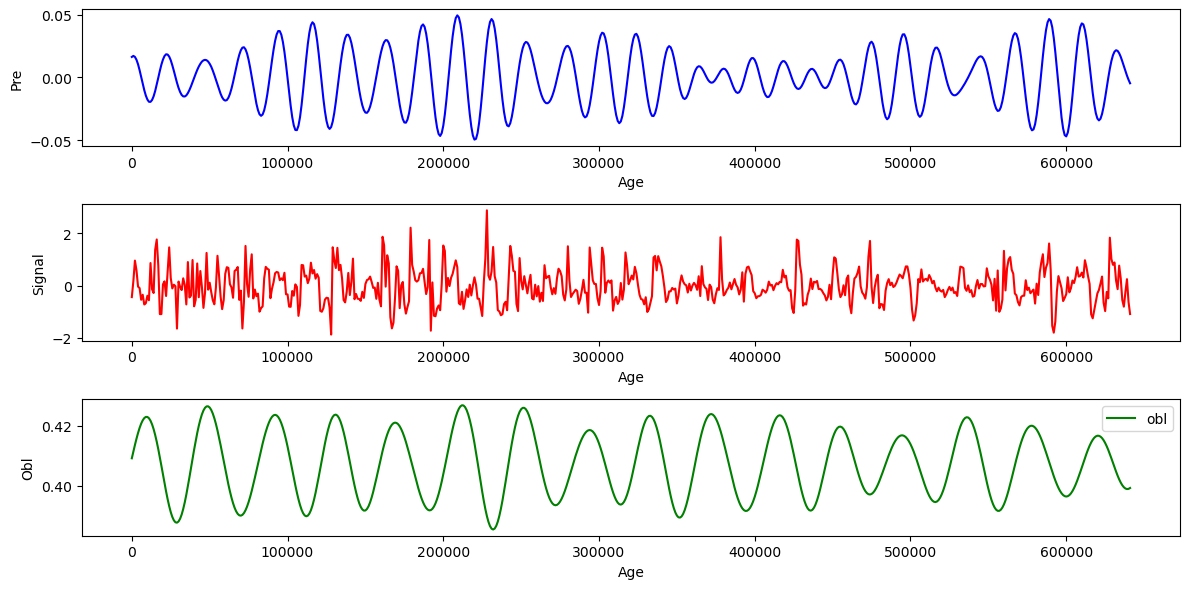

        age       pre
0  641000.0  0.016280
1  640000.0  0.017116
2  639000.0  0.016308
3  638000.0  0.014018
4  637000.0  0.010453


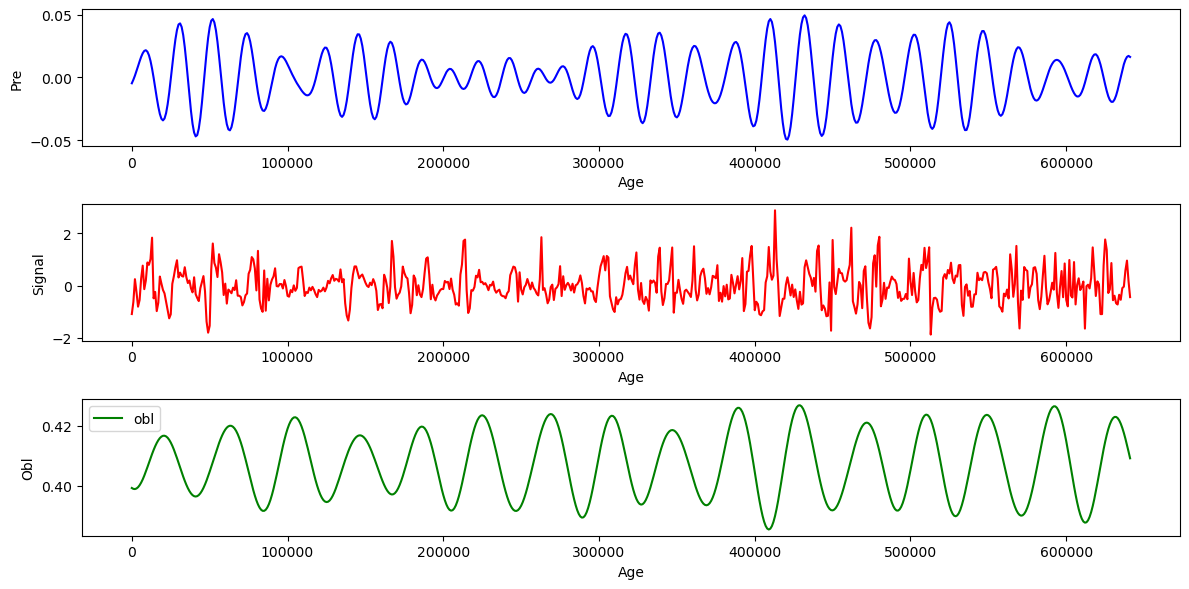

642
642


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# path to your file
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"

# read the first sheet into a DataFrame
df = pd.read_excel(file_path)
# age =age *1000
df['age'] = df['age'] * 1000

print(df.head())
# print the age max and min
print(df['age'].max())
print(df['age'].min())



import pandas as pd
from scipy.interpolate import interp1d

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)

df_obl = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)

df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000
df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]
df_pre.columns = ['age', 'pre']

df_obl = df_obl.iloc[::-1]
df_obl.columns = ['age', 'obl']

# plot df_pre
plt.figure(figsize=(12, 6))
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
print(df_pre)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_obl.iloc[:, 0], df_obl.iloc[:, 1], label='obl', color='blue')
plt.xlabel("Age")
plt.ylabel("Obl")
print(df_obl)
plt.show()


# crop the df_pre between Start age:  9540 End age:  122280
df_pre = df_pre[(df_pre['age'] >= 0) & (df_pre['age'] <= 641200)]
df_obl = df_obl[(df_obl['age'] >= 0) & (df_obl['age'] <= 641200)]

print(df_pre.head())
print(df_obl.head())

# # build an interpolator; use 'nearest' to preserve the step
f = interp1d(df['age'], df['d18O'], kind='nearest',
             bounds_error=False,
             fill_value=1)            

interpolated_sq = f(df_pre['age'].values)



df=pd.DataFrame({'age':df_pre['age'].values,'d18O':interpolated_sq})
df_sd=df.copy()

window = int(10000 / np.median(np.diff(df["age"])))
df["smoothed"] = df["d18O"].rolling(window=window, center=True, min_periods=1).mean()

# 3) Millennial‐scale signal = original minus low‐frequency
df_sd["d18O"] = df["d18O"] - df["smoothed"]

# reset index of df_sd and df_pre according to the sorted age
df_sd = df_sd.sort_values(by='age').reset_index(drop=True)
df_pre = df_pre.sort_values(by='age').reset_index(drop=True)
df_obl = df_obl.sort_values(by='age').reset_index(drop=True)

# 4) Plot to check
plt.figure(figsize=(12, 6))
plt.plot(df["age"], df["d18O"],       label="Original d¹⁸O",   alpha=0.5)
plt.plot(df["age"], df["smoothed"],   label=f"{8000} yr rolling mean", linewidth=2)
plt.plot(df["age"], df["d18O"],     label="Millennial‐scale signal", linestyle="--")
# plt.gca().invert_xaxis()  # if age is “years before present”
plt.xlabel("Age (yr BP)")
plt.ylabel("d¹⁸O")
plt.legend()
plt.show()


# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.legend()
plt.tight_layout()
plt.show()




df_pre['age']=df_pre['age'].values * -1 +641000
df_sd['age']=df_sd['age'].values * -1 +641000
df_obl['age']=df_obl['age'].values * -1 +641000

print(df_pre.head())

# flip the two dfs upside down
df_pre = df_pre.iloc[::-1]
df_sd = df_sd.iloc[::-1]
df_obl = df_obl.iloc[::-1]

# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.legend()
plt.tight_layout()
plt.show()

# print the length of df
print(len(df_pre))
print(len(df_sd))








Using lib=1 632, pred=1 632


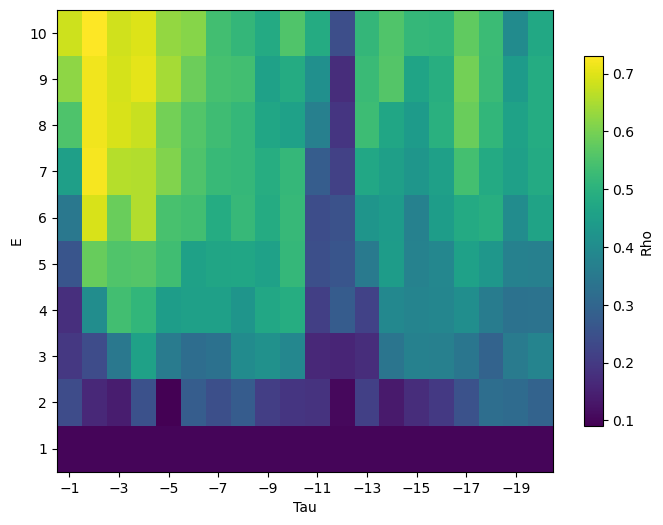

Best E=10, tau=-2 with rho=0.731
Optimal E = 10   Optimal tau = -2


In [75]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

best_E, best_tau, rho_matrix = cf.find_optimal_E_tau(
    df_sd   = df_sd,
    df_pre  = df_pre,
    maxE    = 10,
    tau_min  = -20,
    Tp=0,
)
print("Optimal E =", best_E, "  Optimal tau =", best_tau)

In [44]:
df_pre

,age,pre
641,200.0,-0.004658
640,1200.0,-0.001830
639,2200.0,0.001432
638,3200.0,0.005100
637,4200.0,0.008929
...,...,...
4,637200.0,0.010453
3,638200.0,0.014018
2,639200.0,0.016308
1,640200.0,0.017116


In [43]:
df_sd

,age,d18O
641,200.0,-1.086167
640,1200.0,-0.624143
639,2200.0,0.247750
638,3200.0,-0.246556
637,4200.0,-0.802900
...,...,...
4,637200.0,-0.036667
3,638200.0,0.582500
2,639200.0,0.958571
1,640200.0,0.175000


# Processing CO2 and LR04

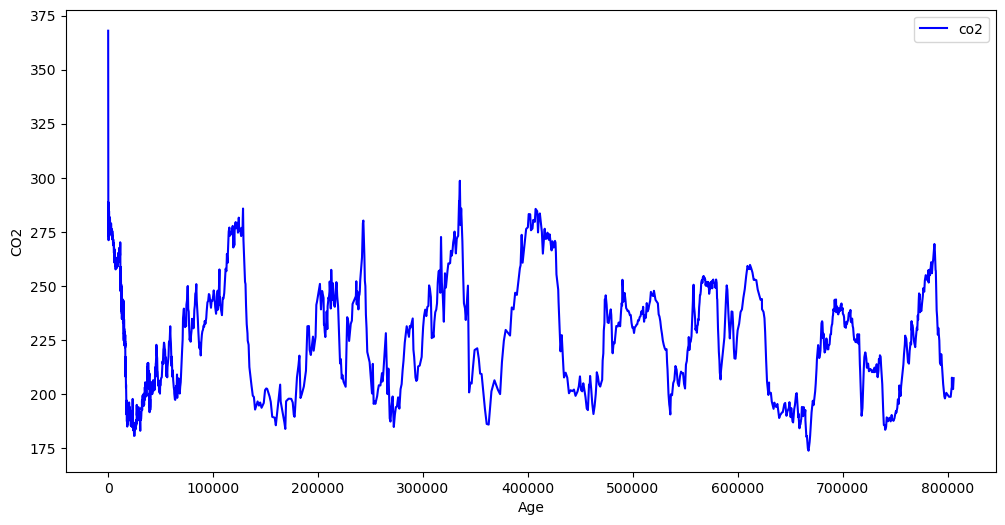

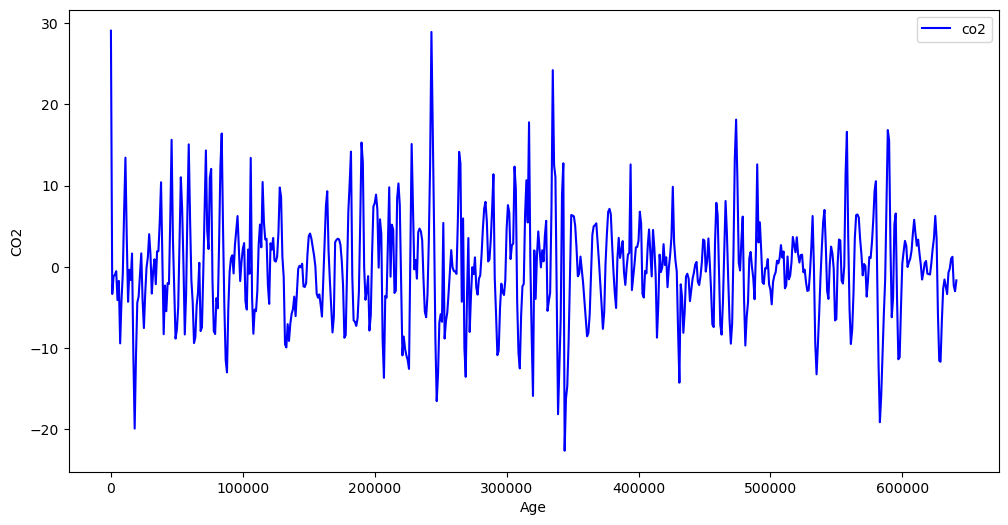

        age        co2    smoothed
0         0  -1.677188  192.299832
1      1000  -3.017722  192.676484
2      2000  -2.308979  192.748320
3      3000   1.220757  193.023838
4      4000   0.994168  193.541453
..      ...        ...         ...
637  637000  -0.546638  274.735495
638  638000  -1.010478  276.503224
639  639000  -1.167015  279.163598
640  640000  -3.360641  281.242245
641  641000  29.061029  283.655205

[642 rows x 3 columns]
        age      lr04  smoothed
0         0 -0.035833  4.915833
1      1000  0.087143  4.922857
2      2000 -0.018750  4.923750
3      3000 -0.131111  4.931111
4      4000 -0.043000  4.943000
..      ...       ...       ...
637  637000  0.010000  3.290000
638  638000  0.016250  3.273750
639  639000 -0.080000  3.260000
640  640000 -0.018333  3.248333
641  641000 -0.016000  3.246000

[642 rows x 3 columns]


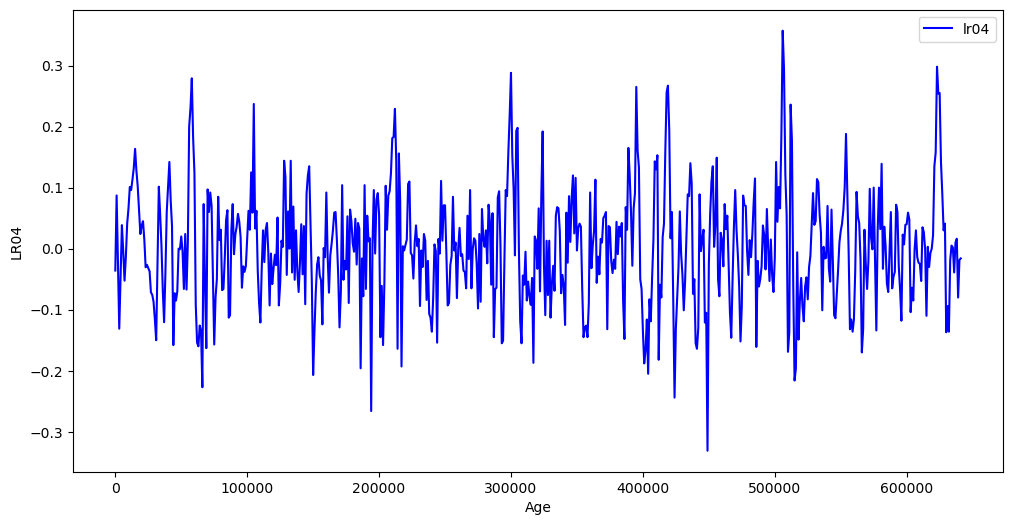

In [61]:
# read composite_co2.xlsx from D:\VScode\bipolar_seesaw_CCM\other_data
df_co2 = pd.read_excel(
    r"D:\VScode\bipolar_seesaw_CCM\other_data\composite_co2.xlsx", 
    sheet_name='Sheet2'
)
# rename the columns to 'age' and 'co2'
df_co2.columns = ['age', 'co2']
# # plot the hist of age idff
# plt.figure(figsize=(12, 6))
# plt.hist(np.diff(df_co2['age']), bins=100, color='blue', alpha=0.5)
# plt.xlabel("Age")

# plot the df_co2
plt.figure(figsize=(12, 6))
plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
plt.xlabel("Age")
plt.ylabel("CO2")
plt.legend()
plt.show()


# create a nw time from 0 to 641200 with a step of 1000
new_time = np.arange(0, 641200, 1000)
# interpolate the co2 data to the new time
new_co2 = np.interp(new_time, df_co2['age'], df_co2['co2'])
df_co2 = pd.DataFrame({'age': new_time, 'co2': new_co2})



df_co2["smoothed"] = df_co2["co2"].rolling(window=10, center=True, min_periods=1).mean()
df_co2["co2"] = df_co2["co2"] - df_co2["smoothed"]



# plot the df_co2
plt.figure(figsize=(12, 6))
plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
plt.xlabel("Age")
plt.ylabel("CO2")
plt.legend()
plt.show()

df_co2['age']=df_co2['age'].values * -1 +641000



# flip the two dfs upside down
df_co2 = df_co2.iloc[::-1]
# reset the index of df_co2
df_co2 = df_co2.reset_index(drop=True)
print(df_co2)




df_lr04= pd.read_excel(
    r"D:\VScode\bipolar_seesaw_CCM\other_data\lr04.xlsx", 
    sheet_name='Sheet1'
)

df_lr04.columns = ['age', 'lr04']
# age = age * 1000
df_lr04['age'] = df_lr04['age'] * 1000

new_time = np.arange(0, 641200, 1000)
# interpolate the co2 data to the new time
new_lr04 = np.interp(new_time, df_lr04['age'], df_lr04['lr04'])
df_lr04 = pd.DataFrame({'age': new_time, 'lr04': new_lr04})


df_lr04["smoothed"] = df_lr04["lr04"].rolling(window=10, center=True, min_periods=1).mean()
df_lr04["lr04"] = df_lr04["lr04"] - df_lr04["smoothed"]


df_lr04['age']=df_lr04['age'].values * -1 +641000
# flip the two dfs upside down
df_lr04 = df_lr04.iloc[::-1]
# reset the index of df_lr04
df_lr04 = df_lr04.reset_index(drop=True)
print(df_lr04)

# plot the df_lr04
plt.figure(figsize=(12, 6))
plt.plot(df_lr04['age'], df_lr04['lr04'], label='lr04', color='blue')
plt.xlabel("Age")
plt.ylabel("LR04")
plt.legend()
plt.show()


In [20]:
df_sd

,age,d18O
641,200.0,-1.086167
640,1200.0,-0.624143
639,2200.0,0.247750
638,3200.0,-0.246556
637,4200.0,-0.802900
...,...,...
4,637200.0,-0.036667
3,638200.0,0.582500
2,639200.0,0.958571
1,640200.0,0.175000


In [24]:
df_pre

,age,pre
641,200.0,-0.004658
640,1200.0,-0.001830
639,2200.0,0.001432
638,3200.0,0.005100
637,4200.0,0.008929
...,...,...
4,637200.0,0.010453
3,638200.0,0.014018
2,639200.0,0.016308
1,640200.0,0.017116


In [23]:
df_pre['age'].values

array([2.000e+02, 1.200e+03, 2.200e+03, 3.200e+03, 4.200e+03, 5.200e+03,
       6.200e+03, 7.200e+03, 8.200e+03, 9.200e+03, 1.020e+04, 1.120e+04,
       1.220e+04, 1.320e+04, 1.420e+04, 1.520e+04, 1.620e+04, 1.720e+04,
       1.820e+04, 1.920e+04, 2.020e+04, 2.120e+04, 2.220e+04, 2.320e+04,
       2.420e+04, 2.520e+04, 2.620e+04, 2.720e+04, 2.820e+04, 2.920e+04,
       3.020e+04, 3.120e+04, 3.220e+04, 3.320e+04, 3.420e+04, 3.520e+04,
       3.620e+04, 3.720e+04, 3.820e+04, 3.920e+04, 4.020e+04, 4.120e+04,
       4.220e+04, 4.320e+04, 4.420e+04, 4.520e+04, 4.620e+04, 4.720e+04,
       4.820e+04, 4.920e+04, 5.020e+04, 5.120e+04, 5.220e+04, 5.320e+04,
       5.420e+04, 5.520e+04, 5.620e+04, 5.720e+04, 5.820e+04, 5.920e+04,
       6.020e+04, 6.120e+04, 6.220e+04, 6.320e+04, 6.420e+04, 6.520e+04,
       6.620e+04, 6.720e+04, 6.820e+04, 6.920e+04, 7.020e+04, 7.120e+04,
       7.220e+04, 7.320e+04, 7.420e+04, 7.520e+04, 7.620e+04, 7.720e+04,
       7.820e+04, 7.920e+04, 8.020e+04, 8.120e+04, 

# Pre

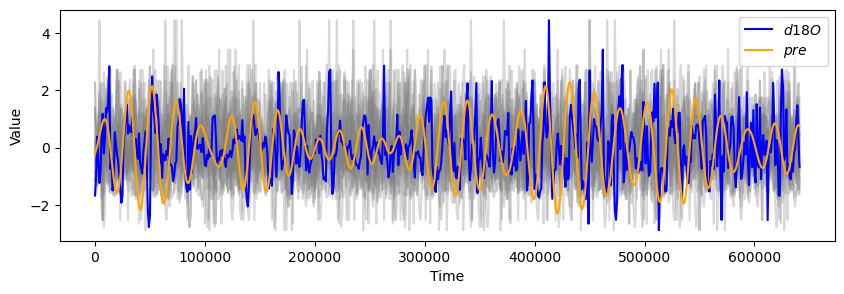

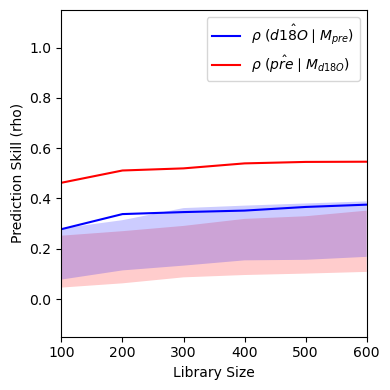

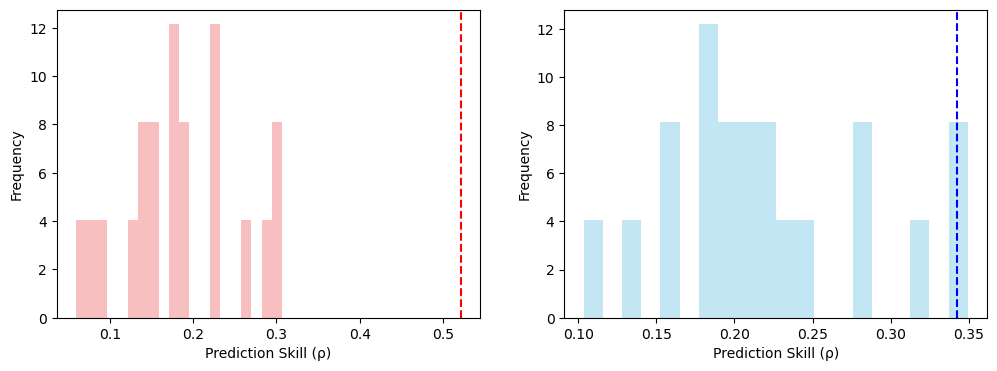

In [78]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_pre,
    E=6, 
    tau=-5, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

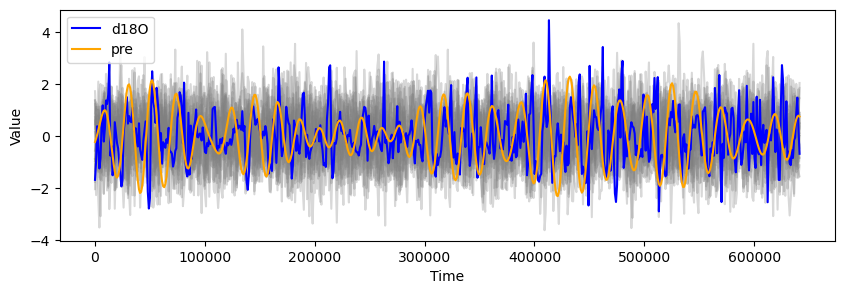

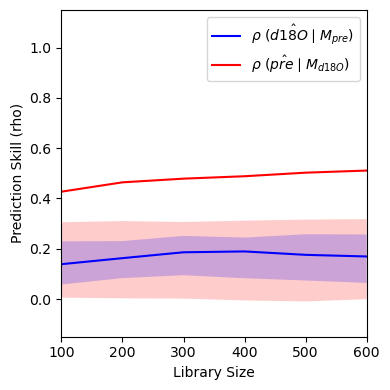

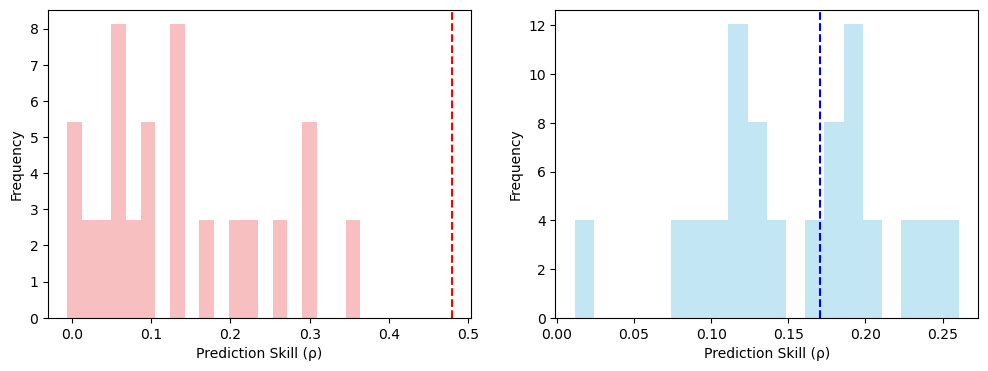

In [21]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

# Obl

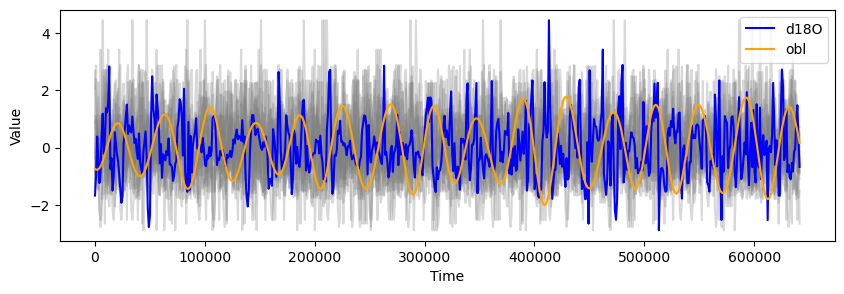

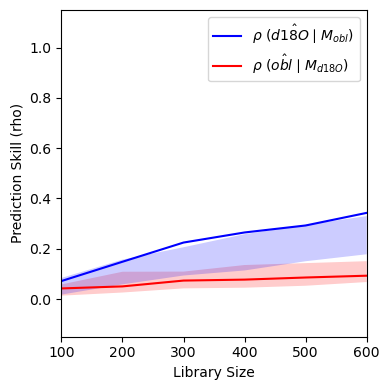

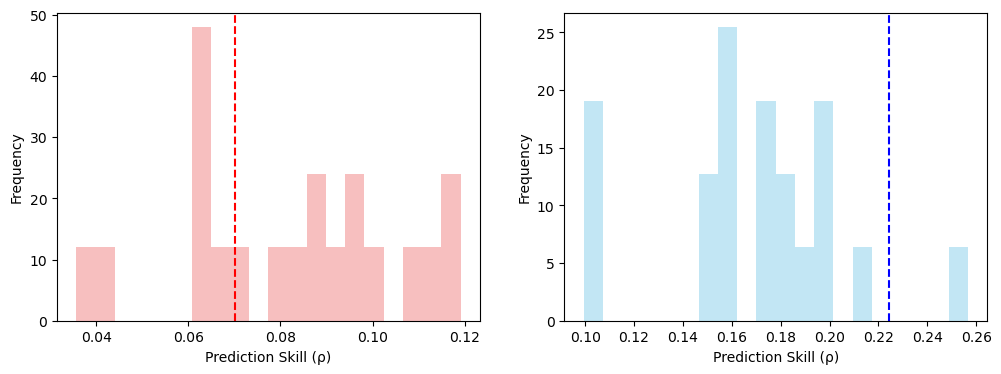

In [2]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_obl,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

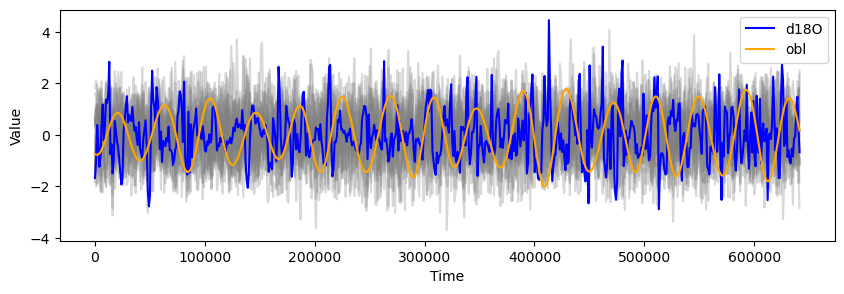

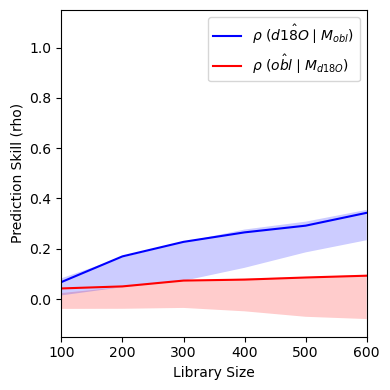

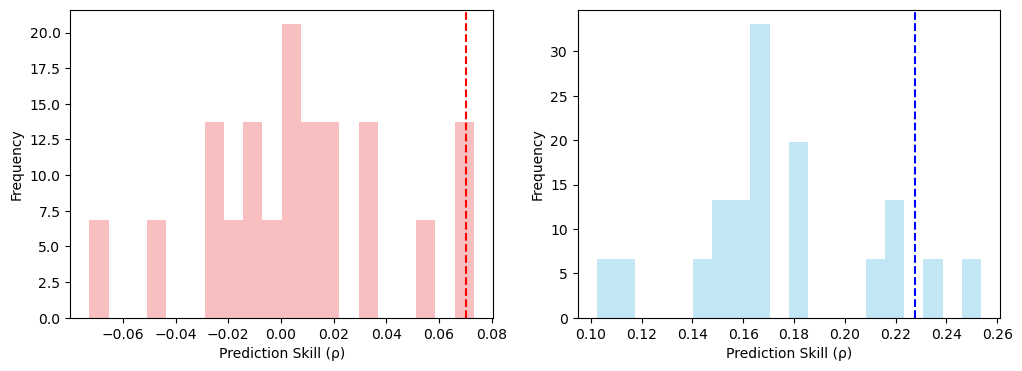

In [3]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_obl,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

In [4]:
test_result

False

# CO2

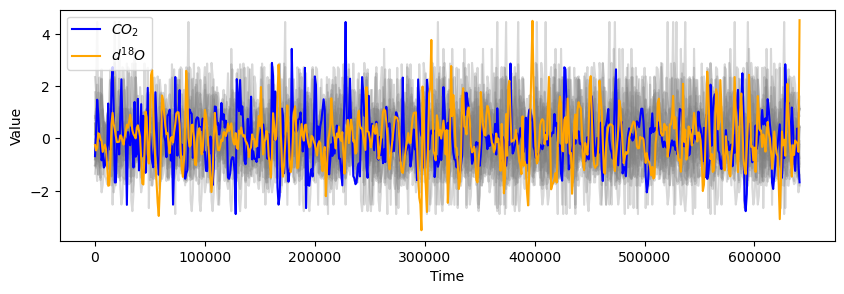

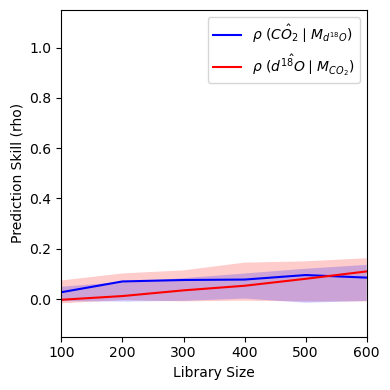

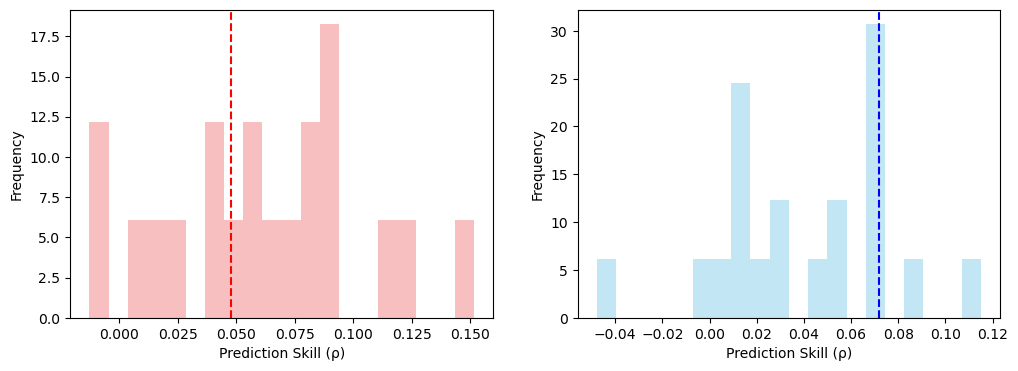

In [72]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_co2,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True,
    title_column_name='CO_2',
    title_target_name='d^{18}O')

    


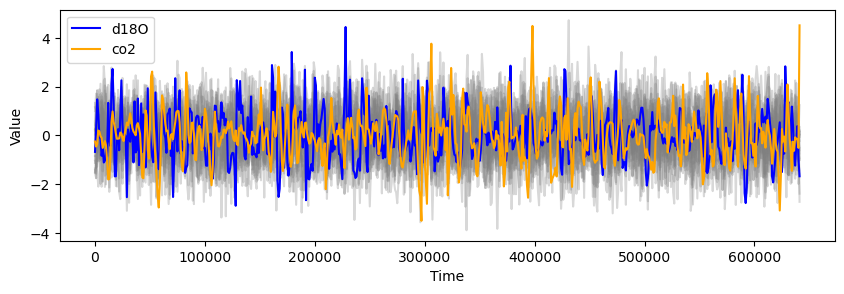

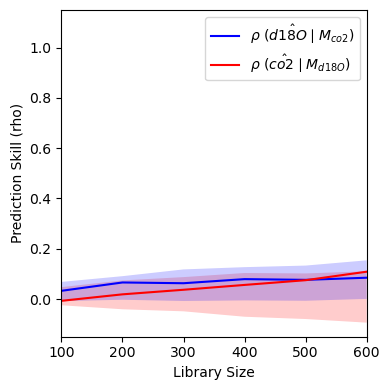

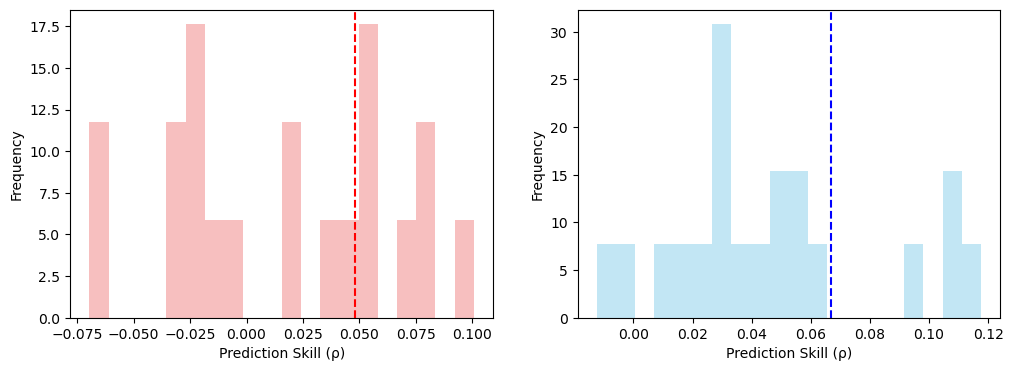

In [63]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_co2,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

# LR04

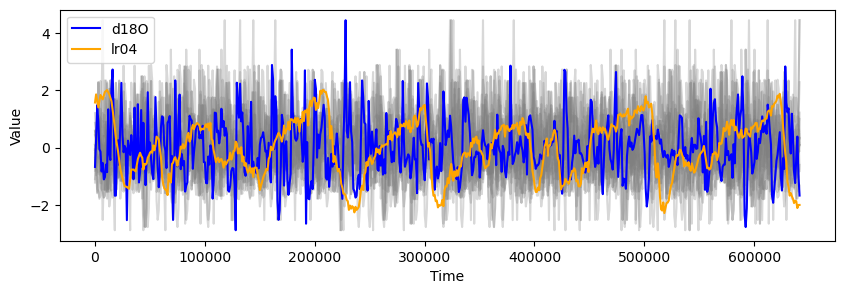

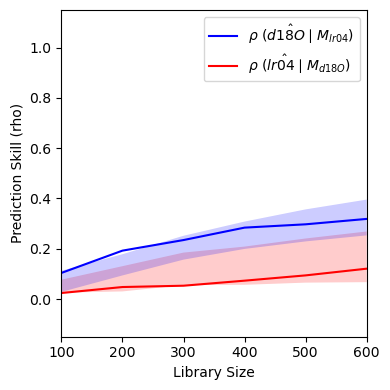

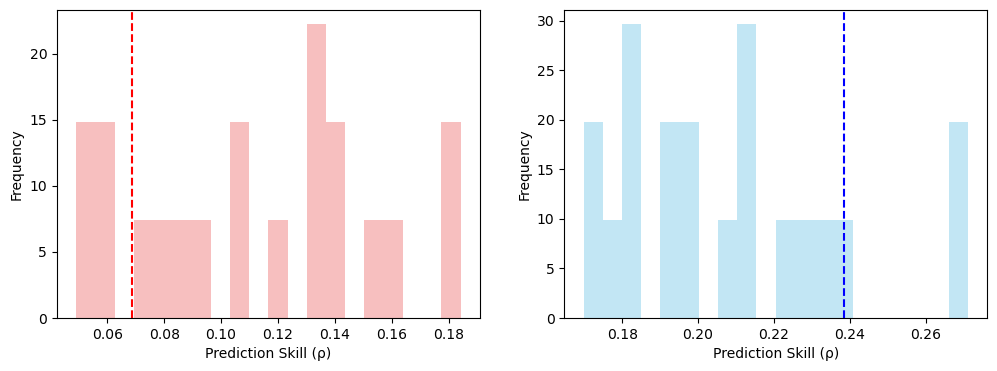

In [49]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_lr04,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

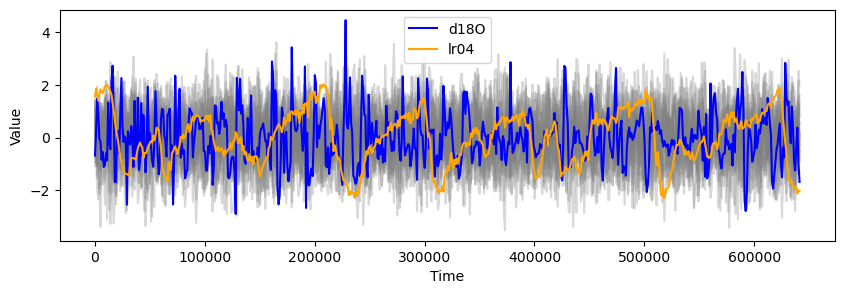

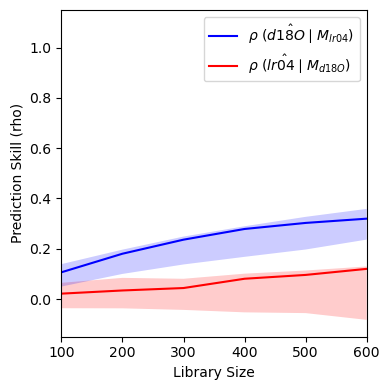

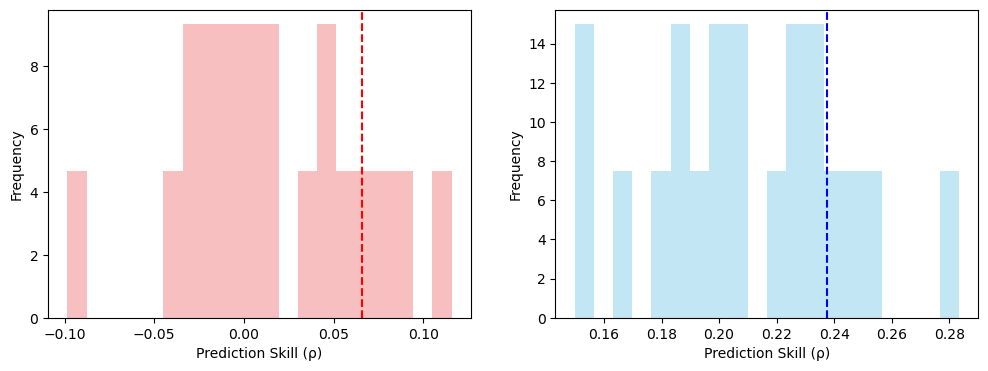

In [50]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_lr04,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

# extract sequence

In [12]:
import numpy as np
import pandas as pd

def threshold_to_noise(df, 
                       col='d18O', 
                       lower_pct=5, 
                       upper_pct=95, 
                       noise_mean=0,
                       sigma=0.5):
    """
    Replace values of df[col] below the lower_pct‐percentile or 
    above the upper_pct‐percentile with white noise.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with at least the column `col`.
    col : str
        Name of the column to threshold.
    lower_pct : float
        Lower percentile cutoff (0–100).
    upper_pct : float
        Upper percentile cutoff (0–100).
    noise_mean : float
        Mean of the white‐noise distribution (default = 0).
    
    Returns
    -------
    df_out : pandas.DataFrame
        A copy of df where outliers in `col` are replaced by noise.
    lower_bound, upper_bound : float, float
        The thresholds actually used.
    """
    df_out = df.copy()
    series = df_out[col]
    
    # compute percentile thresholds
    lower_bound = np.percentile(series, lower_pct)
    upper_bound = np.percentile(series, upper_pct)
    
    # compute noise parameters
    # sigma = series.std()
    
    # mask of outliers
    mask = (series < lower_bound) | (series > upper_bound)
    n_outliers = mask.sum()
    
    # generate white noise for those positions
    noise = np.random.normal(loc=noise_mean, scale=sigma, size=n_outliers)
    
    # replace
    df_out.loc[mask, col] = noise
    
    print(f"Replaced {n_outliers} values <{lower_bound:.3f} or >{upper_bound:.3f} with N({noise_mean},{sigma:.3f}²) noise")
    return df_out, lower_bound, upper_bound



Replaced 130 values <-0.757 or >0.791 with N(0,0.100²) noise


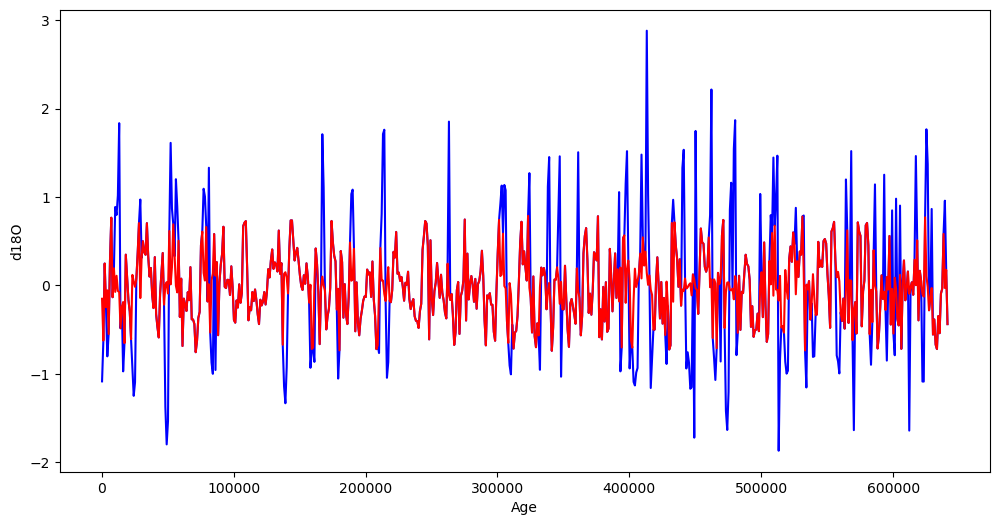

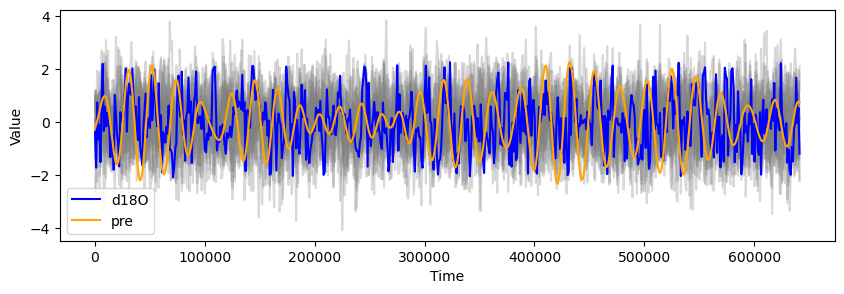

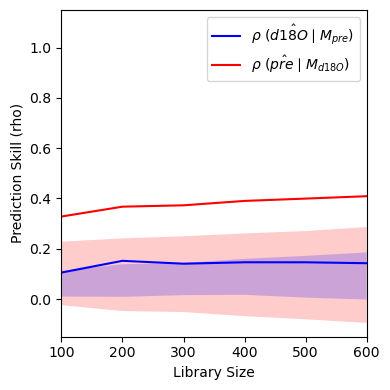

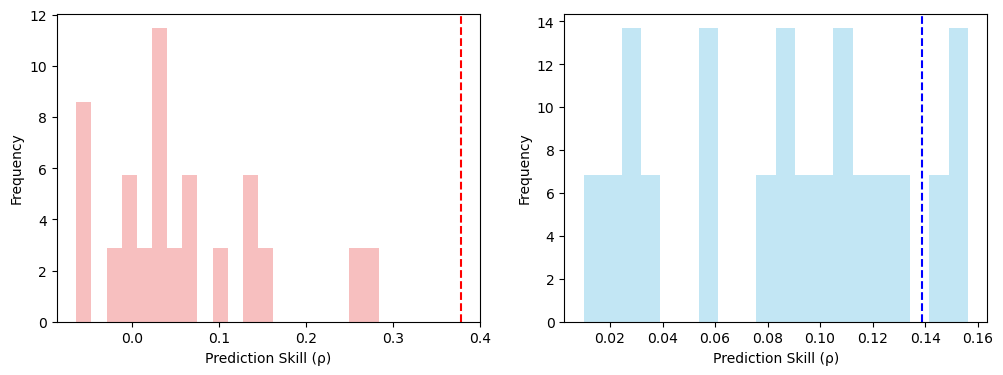

In [18]:
# say you want to replace anything below the 10th or above the 90th percentile:
df_clean, low, high = threshold_to_noise(df_sd.copy(), 
                                        col='d18O',
                                        lower_pct=10, 
                                        upper_pct=90,
                                        noise_mean=0,
                                        sigma=0.1)
                                        

# plot df_clean and df_sd using one plot
plt.figure(figsize=(12, 6))
plt.plot(df_sd['age'], df_sd['d18O'], label='df_sd', color='blue')
plt.plot(df_clean['age'], df_clean['d18O'], label='df_clean', color='red')
plt.xlabel("Age")
plt.ylabel("d18O")



from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_clean, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)